Predikcija cene nekretnina pomoću regresionih modela:
- Linearna regresija (Ridge, Polinomijalna)
- Stabla odluke
- SVM Regresor

1. Ucitavanje i analiza podataka

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
!gdown 1kpGWz3U3l3QqJeX-KsI24UUHGLIhsykv
!gdown 1PFZd4-jj3chbVfqk72rUTdLNe_1rKhOr

Downloading...
From: https://drive.google.com/uc?id=1kpGWz3U3l3QqJeX-KsI24UUHGLIhsykv
To: /content/df_test.csv
100% 500k/500k [00:00<00:00, 98.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PFZd4-jj3chbVfqk72rUTdLNe_1rKhOr
To: /content/df_train.csv
100% 1.02M/1.02M [00:00<00:00, 67.0MB/s]


In [ ]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')
df = pd.concat([df_train,df_test], axis=0)
df.head()

,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,2014-05-15,312000.0,2,2,True,138.42547,False,False,False,2,True,False,5,1
1,2014-11-14,310000.0,2,2,False,105.90942,False,False,False,1,True,False,11,3
2,2014-12-24,320000.0,2,2,False,117.98681,False,True,False,1,False,True,12,2
3,2015-02-22,264500.0,2,3,False,151.43189,False,False,False,2,True,True,2,1
4,2015-01-06,700000.0,3,2,True,341.88304,False,False,False,3,False,False,1,4


In [ ]:
#uzorci i obelezja
print('Broj uzoraka:', df.shape[0])
print('Broj obelezja:', df.shape[1])
print('Broj uzoraka u trening skupu: ', df_train.shape[0])
print('Broj uzoraka u test skupu: ', df_test.shape[0])

Broj uzoraka: 20303
Broj obelezja: 14
Broj uzoraka u trening skupu:  13603
Broj uzoraka u test skupu:  6700


In [ ]:
#provera koliko podataka nedostaje (brojcano i procentualno)
NANs = df.isnull().sum()
print(NANs)
print(NANs/df.shape[0]*100)

date                 0
price                0
bedrooms             0
grade                0
has_basement         0
living_in_m2         0
renovated            0
nice_view            0
perfect_condition    0
real_bathrooms       0
has_lavatory         0
single_floor         0
month                0
quartile_zone        0
dtype: int64
date                 0.0
price                0.0
bedrooms             0.0
grade                0.0
has_basement         0.0
living_in_m2         0.0
renovated            0.0
nice_view            0.0
perfect_condition    0.0
real_bathrooms       0.0
has_lavatory         0.0
single_floor         0.0
month                0.0
quartile_zone        0.0
dtype: float64


In [ ]:
print('Tip podataka:')
print(df.dtypes)

Tip podataka:
date                  object
price                float64
bedrooms               int64
grade                  int64
has_basement            bool
living_in_m2         float64
renovated               bool
nice_view               bool
perfect_condition       bool
real_bathrooms         int64
has_lavatory            bool
single_floor            bool
month                  int64
quartile_zone          int64
dtype: object


In [ ]:
print('Statisticke velicine svih numerickih obelezja:')
print(df.describe())

Statisticke velicine svih numerickih obelezja:
              price      bedrooms         grade  living_in_m2  real_bathrooms  \
count  2.030300e+04  20303.000000  20303.000000  20303.000000    20303.000000   
mean   4.753277e+05      2.239226      2.526031    181.643092        1.674383   
std    2.075574e+05      0.685606      0.970250     68.047356        0.627198   
min    7.500000e+04      1.000000      1.000000     49.238590        1.000000   
25%    3.150000e+05      2.000000      2.000000    130.064200        1.000000   
50%    4.350000e+05      2.000000      2.000000    171.870550        2.000000   
75%    6.000000e+05      3.000000      3.000000    224.825260        2.000000   
max    1.155000e+06      3.000000      5.000000    391.121630        3.000000   

              month  quartile_zone  
count  20303.000000   20303.000000  
mean       6.577255       2.425110  
std        3.117511       1.070923  
min        1.000000       1.000000  
25%        4.000000       2.000000  
5

In [ ]:
#pretvaranje bool u 0/1 obelezja
df['has_basement'] = df['has_basement'].astype(int)
df['renovated'] = df['renovated'].astype(int)
df['nice_view'] = df['nice_view'].astype(int)
df['perfect_condition'] = df['perfect_condition'].astype(int)
df['has_lavatory'] = df['has_lavatory'].astype(int)
df['single_floor'] = df['single_floor'].astype(int)
df.head()

print('Tip podataka:')
print(df.dtypes)

Tip podataka:
date                  object
price                float64
bedrooms               int64
grade                  int64
has_basement           int64
living_in_m2         float64
renovated              int64
nice_view              int64
perfect_condition      int64
real_bathrooms         int64
has_lavatory           int64
single_floor           int64
month                  int64
quartile_zone          int64
dtype: object


In [ ]:
#Opseg, srednja vrednost i medijana
cena_min_df = df['price'].min()
cena_max_df = df['price'].max()
cena_mean_df = df['price'].mean()
cena_median_df = df['price'].median()

print(f"Opseg : {cena_min_df} - {cena_max_df}")
print(f"Srednja vrednost: {cena_mean_df}")
print(f"Medijana: {cena_median_df}")

Opseg : 75000.0 - 1155000.0
Srednja vrednost: 475327.7329951239
Medijana: 435000.0


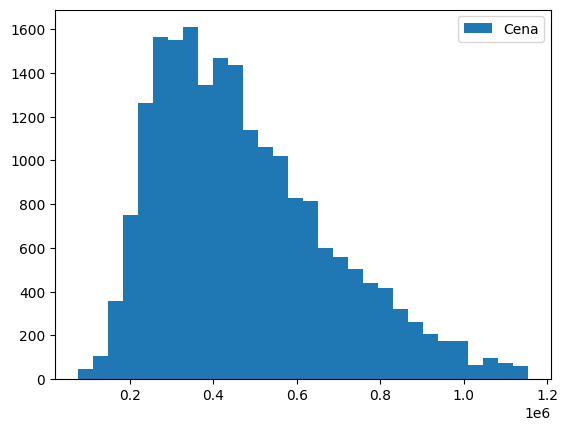

In [ ]:
#izlazna promenljiva koju predvidjamo
plt.hist(df['price'], bins=30, label='Cena')
plt.legend()
plt.show()

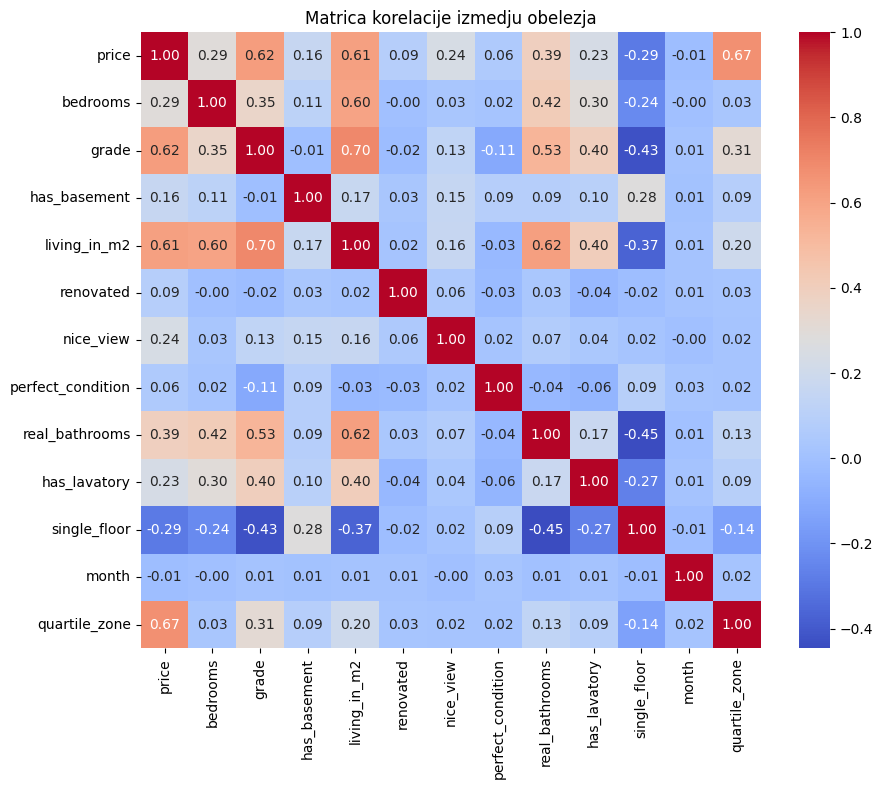

In [ ]:
df.drop(['date'], inplace= True, axis = 1)
plt.figure(figsize=(10,8))
corr_matrix = df.corr()
sb.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matrica korelacije izmedju obelezja')
plt.show()

<Figure size 500x500 with 0 Axes>

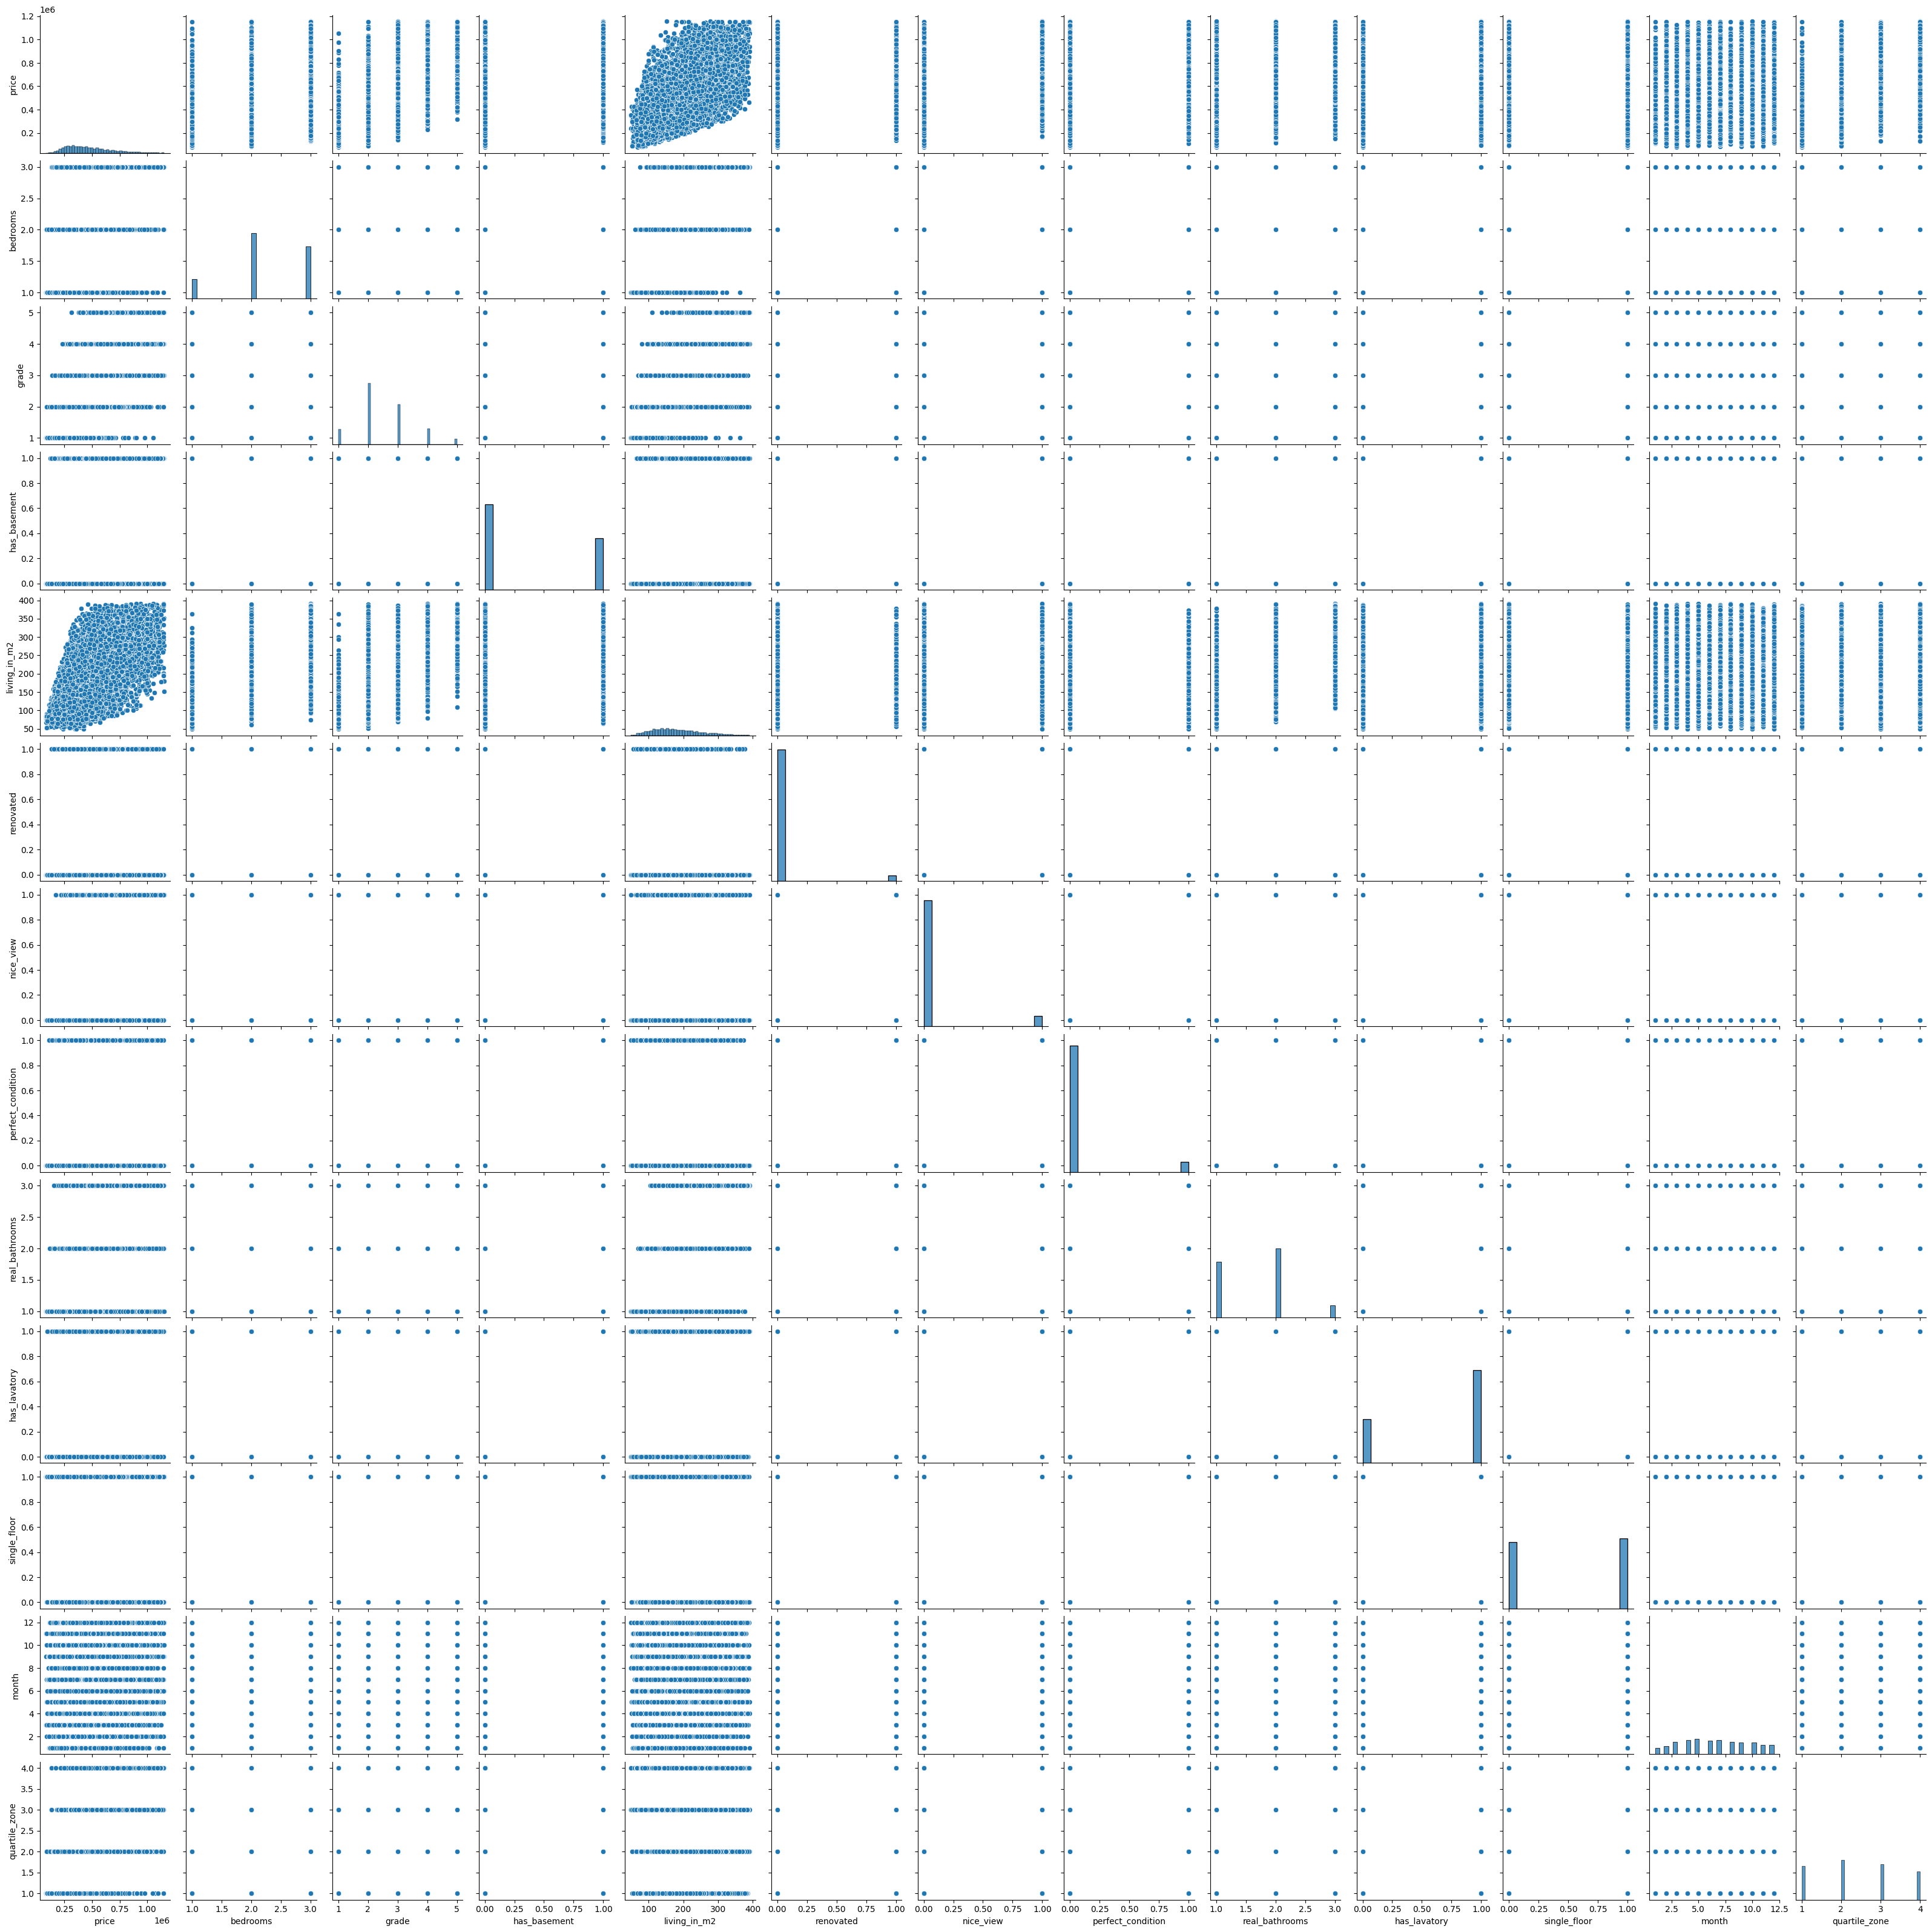

In [ ]:
plt.figure(figsize=(5,5))
sb.pairplot(df_train, height = 2.5)
plt.show();

In [ ]:
print('Broj uzoraka i obelezja:')
print(df.shape)

Broj uzoraka i obelezja:
(20303, 13)


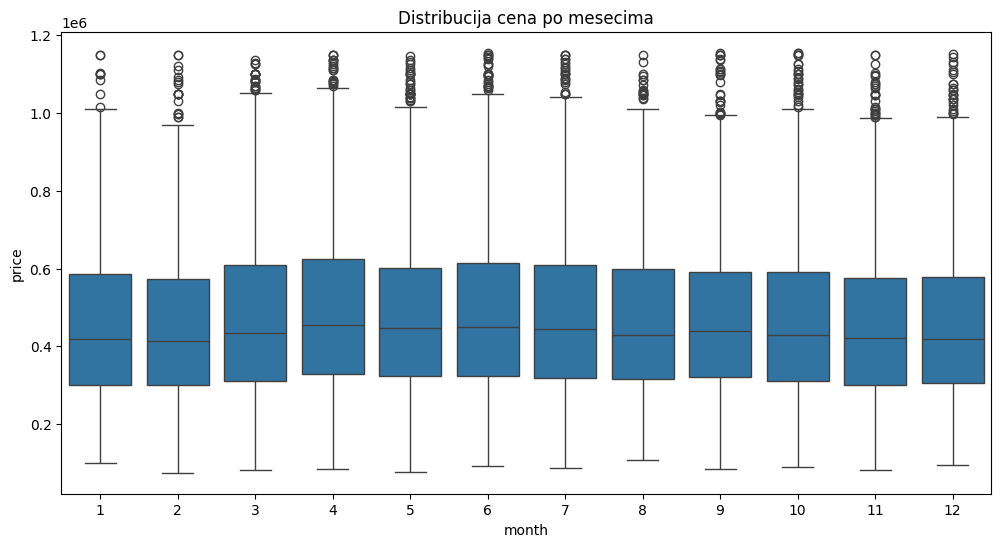

korelacija:
           month     price
month  1.000000 -0.013543
price -0.013543  1.000000


In [ ]:
#Provera uticaja obelezja month(kategoricko) na cenu nekretnina:
plt.figure(figsize=(12, 6))
sb.boxplot(x='month', y='price', data=df)
plt.title('Distribucija cena po mesecima')
plt.show()

corr = df[['month', 'price']].corr()
print("korelacija:\n", corr)


In [ ]:
df.drop(['month'], inplace= True, axis = 1)
df.head()

,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,quartile_zone
0,312000.0,2,2,1,138.42547,0,0,0,2,1,0,1
1,310000.0,2,2,0,105.90942,0,0,0,1,1,0,3
2,320000.0,2,2,0,117.98681,0,1,0,1,0,1,2
3,264500.0,2,3,0,151.43189,0,0,0,2,1,1,1
4,700000.0,3,2,1,341.88304,0,0,0,3,0,0,4


In [ ]:
print(df.shape)

(20303, 12)


2. Podela podataka na train, test i validacioni skup

In [ ]:
#Kako nam je baza vec podeljena na trening i test skup nije potrebna nova podela
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

numeric_feats = [
    'bedrooms', 'grade', 'living_in_m2', 'real_bathrooms',
     'quartile_zone'
]

categoric_feats = [
    'has_basement', 'renovated',
    'nice_view', 'perfect_condition', 'has_lavatory', 'single_floor'
]

X_train, X_val, y_train, y_val = train_test_split(df_train[numeric_feats + categoric_feats], df_train['price'], train_size=0.9, random_state=42)
X_test = df_test[numeric_feats + categoric_feats]
y_test = df_test['price']

s = StandardScaler()
s.fit(X_train[numeric_feats])
X_train.loc[:, numeric_feats] = s.transform(X_train[numeric_feats])
X_test.loc[:, numeric_feats] = s.transform(X_test[numeric_feats])
X_val.loc[:, numeric_feats] = s.transform(X_val[numeric_feats])

/tmp/ipython-input-4062924526.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.34792548 -0.34792548  1.11575279 ... -0.34792548 -0.34792548
 -0.34792548]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numeric_feats] = s.transform(X_train[numeric_feats])
/tmp/ipython-input-4062924526.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.5206503  -0.54926697  0.48569166 ... -0.54926697 -0.54926697
 -0.54926697]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numeric_feats] = s.transform(X_train[numeric_feats])
/tmp/ipython-input-4062924526.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.50746486  0.50746486  0.50746486 ...  0.50746486 -1.08219

3. Linearna regresija + Ridge + Polinomijalna regresija

In [ ]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

#Linearna regresija
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_predicted_linear = linear_model.predict(X_val)

linear_rmse = np.sqrt(mean_squared_error(y_val, y_predicted_linear))
linear_r2 = r2_score(y_val, y_predicted_linear)
linear_mae = mean_absolute_error(y_val, y_predicted_linear)

#Ridge regresija
alpha_range = [0.1, 0.5, 1.0, 2.0, 2.5, 3, 3.5 , 3.6, 3.7 ,3.8 ,4 ,5.0, 7, 8, 9, 10.0]
param_grid = {'alpha': alpha_range}

ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

y_predicted_ridge = grid_search.best_estimator_.predict(X_val)
ridge_rmse = np.sqrt(mean_squared_error(y_val, y_predicted_ridge))
ridge_r2 = r2_score(y_val, y_predicted_ridge)
ridge_mae = mean_absolute_error(y_val, y_predicted_ridge)

#ln polinomijalna regresija
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

y_train_log = np.log(y_train)
y_val_log = np.log(y_val)

pipeline = Pipeline([
    ("poly", PolynomialFeatures(include_bias=False)),
    ("linear", LinearRegression())
])

param_grid = {"poly__degree": [1, 2, 3, 4]}

grid_poly = GridSearchCV(pipeline,param_grid, cv=5,scoring="neg_mean_squared_error")
grid_poly.fit(X_train, y_train_log)

y_predicted_log = grid_poly.predict(X_val)
y_predicted_poly = np.exp(y_predicted_log)

poly_rmse = np.sqrt(mean_squared_error(y_val, y_predicted_poly))
poly_r2 = r2_score(y_val, y_predicted_poly)
poly_mae = mean_absolute_error(y_val, y_predicted_poly)

regression_comparison_df = pd.DataFrame({
    'Model': ['Linearna Regresija', 'Ridge Regresija', 'Polinomijalna regresija'],
    'RMSE': [linear_rmse, ridge_rmse, poly_rmse],
    'R²': [linear_r2, ridge_r2, poly_r2],
    'MAE': [linear_mae, ridge_mae, poly_mae]
})

regression_comparison_df.head()

,Model,RMSE,R²,MAE
0,Linearna Regresija,105715.630152,0.739095,79211.979844
1,Ridge Regresija,105722.621948,0.739061,79202.653462
2,Polinomijalna regresija,103506.665125,0.749885,74773.223189


In [ ]:
grid_poly.best_params_

{'poly__degree': 2}

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

print("Broj komponenti:", X_train_pca.shape[1])

SyntaxError: invalid syntax (ipython-input-2274807909.py, line 8)

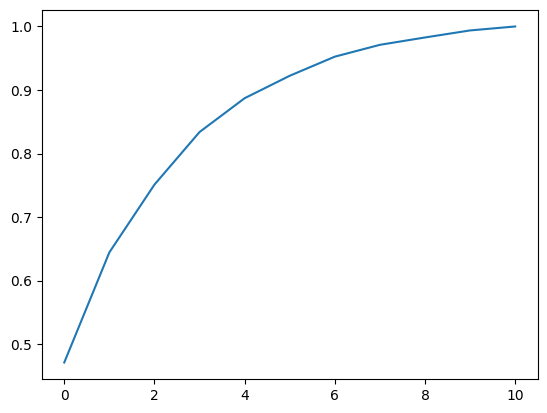

In [ ]:
#zavisnost objašnjene varijanse od broja PCA komponenti
pca = PCA(n_components=None)
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
#PCA Polinomijalna
grid_poly_pca = GridSearchCV(pipeline,param_grid, cv=5,scoring="neg_mean_squared_error")
grid_poly_pca.fit(X_train, y_train_log)
grid_poly_pca.fit(X_train_pca, y_train)

y_predicted_poly_pca = grid_poly_pca.best_estimator_.predict(X_val_pca)
poly_rmse_pca = np.sqrt(mean_squared_error(y_val, y_predicted_poly_pca))
poly_r2_pca = r2_score(y_val, y_predicted_poly_pca)
poly_mae_pca = mean_absolute_error(y_val, y_predicted_poly_pca)

print("Najbolji stepen (PCA):", grid_poly.best_params_['poly__degree'])
print("RMSE (PCA):", poly_rmse_pca)
print("R² (PCA):", poly_r2_pca)
print("MAE (PCA)", poly_mae_pca)

Najbolji stepen (PCA): 2
RMSE (PCA): 106593.10344430828
R² (PCA): 0.7347463168306889
MAE (PCA) 78004.47925631469


4. Regresiono stablo

In [ ]:
from sklearn.tree import DecisionTreeRegressor

params_tree = {
    'max_depth': [None,3, 5, 8, 9, 10, 11, 12, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30, 40, 100, 200]
}

tree = DecisionTreeRegressor(random_state=42)
grid_tree = GridSearchCV(tree, params_tree, cv=5, scoring='neg_mean_squared_error')
grid_tree.fit(X_train, y_train)

y_predicted_tree = grid_tree.best_estimator_.predict(X_val)
tree_rmse = np.sqrt(mean_squared_error(y_val, y_predicted_tree))
tree_r2 = r2_score(y_val, y_predicted_tree)
tree_mae = mean_absolute_error(y_val, y_predicted_tree)


print("Najbolji parametri za Stablo :", grid_tree.best_params_)


tree_df = pd.DataFrame({
    'RMSE': [tree_rmse],
    'R²': [tree_r2],
    'MAE': [tree_mae]
})

tree_df.head()

Najbolji parametri za Stablo : {'max_depth': 11, 'min_samples_split': 100}


,RMSE,R²,MAE
0,106355.588056,0.735927,78603.429312


In [ ]:
#PCA Stablo odluke
tree = DecisionTreeRegressor(random_state=42)
grid_tree_pca = GridSearchCV(tree, params_tree, cv=5, scoring='neg_mean_squared_error')
grid_tree_pca.fit(X_train_pca, y_train)

y_predicted_tree_pca = grid_tree_pca.best_estimator_.predict(X_val_pca)
tree_rmse_pca = np.sqrt(mean_squared_error(y_val, y_predicted_tree_pca))
tree_r2_pca = r2_score(y_val, y_predicted_tree_pca)
tree_mae_pca = mean_absolute_error(y_val, y_predicted_tree_pca)

print("Najbolji parametri za Stablo odluke (PCA):", grid_tree_pca.best_params_)
print("RMSE (PCA):", tree_rmse_pca)
print("R² (PCA):", tree_r2_pca)
print("MAE (PCA):", tree_mae_pca)

Najbolji parametri za Stablo odluke (PCA): {'max_depth': 12, 'min_samples_split': 200}
RMSE (PCA): 112994.98634216534
R² (PCA): 0.7019277421229337
MAE (PCA): 82910.4943981074


5. SVR Regresor

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import Pipeline

param_svr = {
    'svr__C': [0.1, 1, 10, 50, 80, 100, 120, 150, 200, 300],
    'svr__epsilon': [0.1, 0.5, 1, 1,5, 2, 2,5, 3, 3,5, 4]
}
pipeline_svr = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', LinearSVR(max_iter=10000, random_state=42))
])

grid_svr = GridSearchCV(pipeline_svr, param_svr, cv=5, scoring='neg_mean_squared_error')
grid_svr.fit(X_train, y_train)

y_predicted_svr = grid_svr.best_estimator_.predict(X_val)
svr_rmse = np.sqrt(mean_squared_error(y_val, y_predicted_svr))
svr_r2 = r2_score(y_val, y_predicted_svr)
svr_mae = mean_absolute_error(y_val, y_predicted_svr)

print("SVR najbolji parametri:", grid_svr.best_params_)


svr_df = pd.DataFrame({
    'RMSE': [svr_rmse],
    'R²': [svr_r2],
    'MAE': [svr_mae]
})

svr_df.head()


SVR najbolji parametri: {'svr__C': 300, 'svr__epsilon': 5}


,RMSE,R²,MAE
0,110207.208657,0.716454,79372.989817


In [ ]:
#PCA SVR regresor
svr_pca = LinearSVR()
grid_svr_pca = GridSearchCV(pipeline_svr, param_svr, cv=5, scoring='neg_mean_squared_error')
grid_svr_pca.fit(X_train_pca, y_train)

y_predicted_svr_pca = grid_svr_pca.best_estimator_.predict(X_val_pca)
svr_rmse_pca = np.sqrt(mean_squared_error(y_val, y_predicted_svr_pca))
svr_r2_pca = r2_score(y_val, y_predicted_svr_pca)
svr_mae_pca = mean_absolute_error(y_val,y_predicted_svr_pca)

print("Najbolji parametri za SVR regresor (PCA):", grid_svr_pca.best_params_)
print("RMSE (PCA):", svr_rmse_pca)
print("R² (PCA):", svr_r2_pca)
print("MAE:", svr_mae_pca)

Najbolji parametri za SVR regresor (PCA): {'svr__C': 300, 'svr__epsilon': 5}
RMSE (PCA): 118083.74089774293
R² (PCA): 0.674475698499033
MAE: 83928.59770230204


Uporedni rezultati sva 3 algoritma

In [ ]:
results = pd.DataFrame({
    'Model': ['Polinomijalna regresija', 'Polinomijalna regresija', 'Regresiono stablo', 'Regresiono stablo', 'SVM Regresor', 'SVM Regresor'],
    'Prostor': ['Original', 'PCA', 'Original', 'PCA', 'Original', 'PCA'],
    'RMSE': [poly_rmse, poly_rmse_pca, tree_rmse, tree_rmse_pca, svr_rmse, svr_rmse_pca],
    'R²': [poly_r2, poly_r2_pca, tree_r2, tree_r2_pca, svr_r2, svr_r2_pca],
    'MAE': [poly_mae, poly_mae_pca, tree_mae, tree_mae_pca, svr_mae, svr_mae_pca]
})

results.head(7)

,Model,Prostor,RMSE,R²,MAE
0,Polinomijalna regresija,Original,103506.665125,0.749885,74773.223189
1,Polinomijalna regresija,PCA,106593.103444,0.734746,78004.479256
2,Regresiono stablo,Original,106355.588056,0.735927,78603.429312
3,Regresiono stablo,PCA,112994.986342,0.701928,82910.494398
4,SVM Regresor,Original,110207.208657,0.716454,79372.989817
5,SVM Regresor,PCA,118083.740898,0.674476,83928.597702


Sva tri algoritma daju bolje rezultate u originalnom prostoru

6. Obuka i testiranje algoritama izabranih algoritama




In [ ]:
X_full_train = pd.concat([X_train, X_val])
y_full_train = pd.concat([y_train, y_val])

best_degree = grid_poly.best_params_['poly__degree']
poly1 = PolynomialFeatures(degree=best_degree, include_bias=False)
X_full_train_poly = poly1.fit_transform(X_full_train)
X_test_poly = poly1.transform(X_test)
model_poly = LinearRegression()
model_poly.fit(X_full_train_poly, np.log(y_full_train))
y_pred_poly_log = model_poly.predict(X_test_poly)
y_pred_poly = np.exp(y_pred_poly_log)
poly1_rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))
poly1_r2 = r2_score(y_test, y_pred_poly)
poly1_mae = mean_absolute_error(y_test, y_pred_poly)

tree1 = DecisionTreeRegressor(**grid_tree.best_params_, random_state=42)
tree1.fit(X_full_train, y_full_train)
y_pred_tree = tree1.predict(X_test)
tree1_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))
tree1_r2 = r2_score(y_test, y_pred_tree)
tree1_mae = mean_absolute_error(y_test, y_pred_tree)

best_params = grid_svr.best_params_
svr1 = LinearSVR(C=grid_svr.best_params_['svr__C'], epsilon=grid_svr.best_params_['svr__epsilon'], max_iter=10000, random_state=42)
svr1.fit(X_full_train, y_full_train)
y_pred_svr = svr1.predict(X_test)
svr1_rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))
svr1_r2 = r2_score(y_test, y_pred_svr)
svr1_mae = mean_absolute_error(y_test, y_pred_svr)

final_results = pd.DataFrame({
    'Model': ['Polinomijalna Regresija', 'Regresiono stablo', 'SVR Regresor'],
    'RMSE (test)': [poly1_rmse, tree1_rmse, svr1_rmse],
    'R² (test)': [poly1_r2, tree1_r2, svr1_r2],
    'MAE (test)': [poly1_mae, tree1_mae, svr1_mae]
})

final_results.head(7)

,Model,RMSE (test),R² (test),MAE (test)
0,Polinomijalna Regresija,103248.027221,0.753678,74250.605704
1,Regresiono stablo,106610.312435,0.737374,77528.086322
2,SVR Regresor,112373.230867,0.708213,80869.361939


/tmp/ipython-input-2097044630.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Model', y='RMSE (test)', data=final_results, palette='Blues')
/tmp/ipython-input-2097044630.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Model', y='R² (test)', data=final_results, palette='Greens')
/tmp/ipython-input-2097044630.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Model', y='MAE (test)', data=final_results, palette='Oranges')


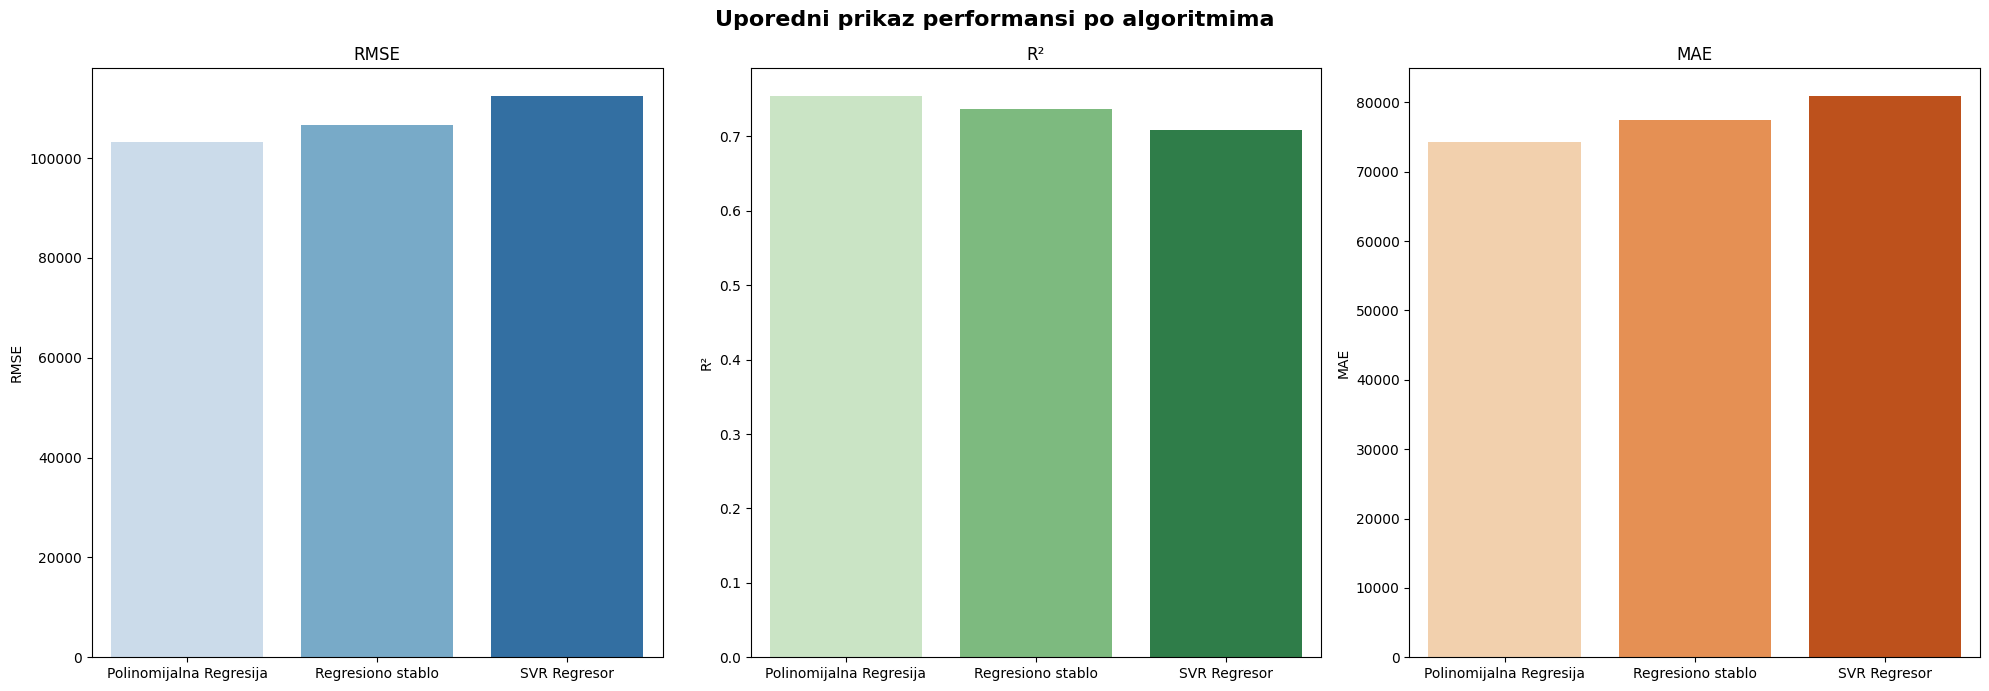

In [ ]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 3, 1)
sb.barplot(x='Model', y='RMSE (test)', data=final_results, palette='Blues')
plt.title("RMSE")
plt.ylabel("RMSE")
plt.xlabel("")

plt.subplot(1, 3, 2)
sb.barplot(x='Model', y='R² (test)', data=final_results, palette='Greens')
plt.title("R²")
plt.ylabel("R²")
plt.xlabel("")

plt.subplot(1, 3, 3)
sb.barplot(x='Model', y='MAE (test)', data=final_results, palette='Oranges')
plt.title("MAE")
plt.ylabel("MAE")
plt.xlabel("")

plt.suptitle("Uporedni prikaz performansi po algoritmima", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

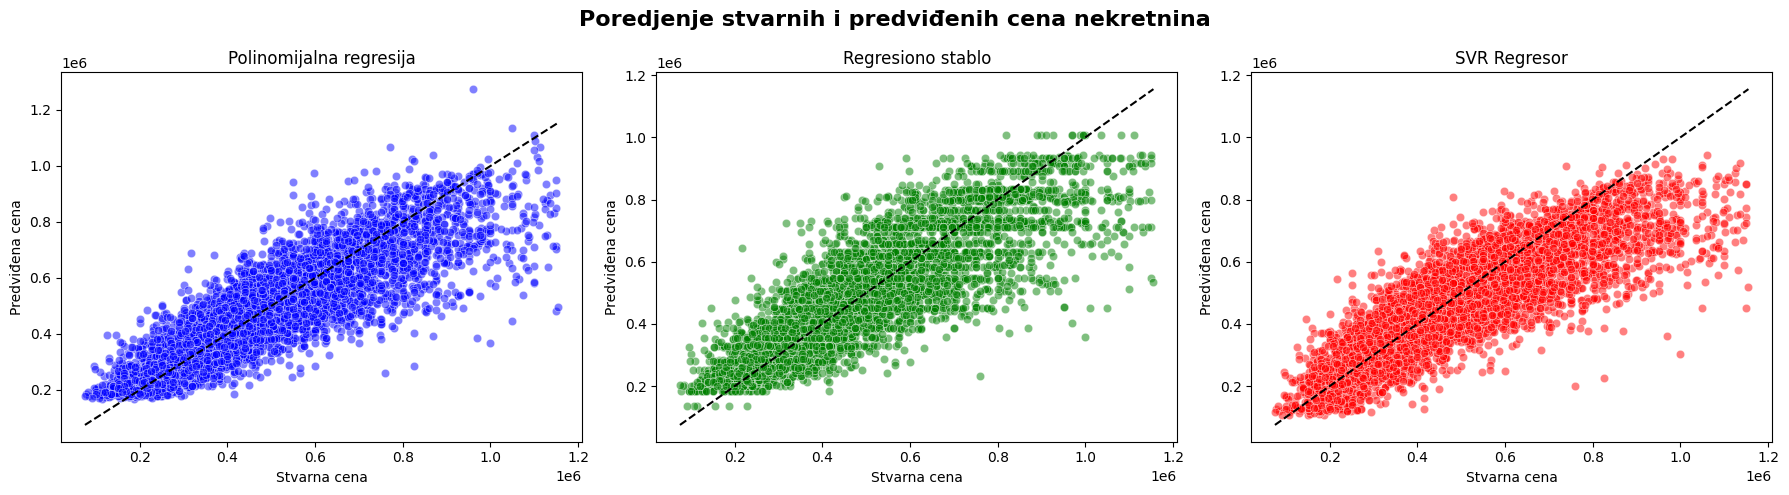

In [ ]:
plt.figure(figsize=(18, 5))

# Polinomijalna regresija
plt.subplot(1, 3, 1)
sb.scatterplot(x=y_test, y=y_pred_poly, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title("Polinomijalna regresija")
plt.xlabel("Stvarna cena")
plt.ylabel("Predviđena cena")

# Stablo odluke
plt.subplot(1, 3, 2)
sb.scatterplot(x=y_test, y=y_pred_tree, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title("Regresiono stablo")
plt.xlabel("Stvarna cena")
plt.ylabel("Predviđena cena")

# SVR Regresor
plt.subplot(1, 3, 3)
sb.scatterplot(x=y_test, y=y_pred_svr, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title("SVR Regresor")
plt.xlabel("Stvarna cena")
plt.ylabel("Predviđena cena")

plt.suptitle("Poredjenje stvarnih i predviđenih cena nekretnina", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

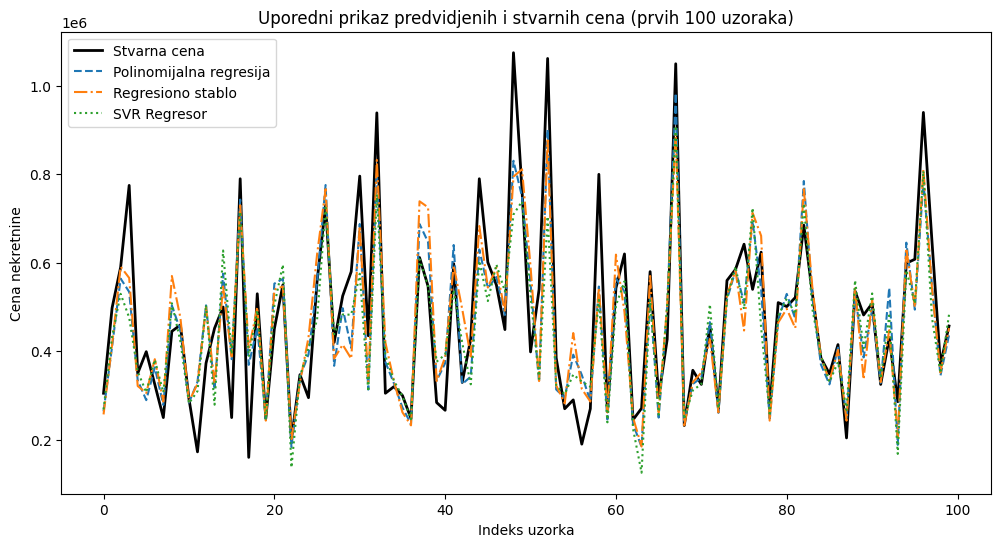

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Stvarna cena', linewidth=2, color='black')
plt.plot(y_pred_poly[:100], label='Polinomijalna regresija', linestyle='--')
plt.plot(y_pred_tree[:100], label='Regresiono stablo', linestyle='-.')
plt.plot(y_pred_svr[:100], label='SVR Regresor', linestyle=':')
plt.title("Uporedni prikaz predvidjenih i stvarnih cena (prvih 100 uzoraka)")
plt.xlabel("Indeks uzorka")
plt.ylabel("Cena nekretnine")
plt.legend()
plt.show()